# Machine Learning Pipeline - Clean Code Version

This notebook demonstrates a comprehensive machine learning pipeline, including data preprocessing, feature engineering, model training, and evaluation for both binary and multi-class classification tasks. Below is an outline of each key section:

1. **Library Imports**: Loads all essential libraries for data handling, visualization, model training, evaluation, and saving.

2. **Data Loading and Cleaning**: Reads the dataset, standardizes column names, and applies initial data quality checks for missing and infinite values.

3. **Data Preprocessing**:
   - Categorical features are filled and encoded using binary encoding.
   - Missing values in numerical features are imputed.
   - Missing data indicators are created for further analysis.

4. **Feature Engineering**:
   - Calculates Variance Inflation Factor (VIF) to identify and remove features with high multicollinearity.
   - Applies Recursive Feature Elimination (RFE) with Linear Regression and RandomForest for feature selection.

5. **Multi-Class Strategy Setup**:
   - Defines a function to wrap models in appropriate multi-class strategies (`OneVsOne` or `OneVsRest`) when applicable.

6. **Model Evaluation Functions**:
   - `evaluate_model_single`: Evaluates binary classification models, displaying ROC and Precision-Recall curves, metrics, and confusion matrix.
   - `evaluate_model_multi`: Evaluates multi-class classification models with class-specific ROC and Precision-Recall curves.

7. **Column Removal**: Removes specified columns from training and test datasets to ensure only relevant features are included in modeling.

8. **Model Training and Evaluation**:
   - Iterates over models, evaluating each based on user-defined selection and multi-class strategy, with progress tracked by a progress bar.
   - Stores and displays the evaluation metrics, including accuracy, precision, recall, F1-score, ROC-AUC, and cross-validation accuracy.

9. **Results Summary and Visualization**:
   - Summarizes results in a DataFrame and saves them to a CSV file.
   - Plots a comparison of performance metrics across models for quick assessment.

10. **Model Saving and Reloading**:
    - Saves all trained models to disk for future use.
    - Demonstrates reloading saved models and making predictions to validate accuracy.

This pipeline is designed to handle both binary and multi-class problems, supports multiple models, and provides detailed performance analysis and visualization for decision-making.

# Let the Fun Begin

**Below code Block Explanation**: This block imports essential libraries required for data handling, encoding, visualization, machine learning models, feature selection, and evaluation metrics. Grouping imports helps keep the code organized, and importing them all at once avoids repetitive imports later in the code.

In [1]:
# === Import Required Libraries ===

# Data Manipulation and Preprocessing
import pandas as pd         # Core data manipulation library
import numpy as np          # Mathematical operations
import category_encoders as ce  # Encoding categorical variables

# Statistical Analysis
from scipy import stats
from scipy.stats import normaltest, shapiro, anderson, kstest, skew
from statsmodels.stats.outliers_influence import variance_inflation_factor  # For multicollinearity checks (VIF)

# Data Visualization
import matplotlib.pyplot as plt         # Basic plotting
import seaborn as sns                   # Advanced static visualizations with themes
import plotly.express as px             # Interactive plots
import missingno as msno                # Visualizing missing data

# Data Preprocessing and Encoding
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize  # Scaling and label encoding
from sklearn.model_selection import train_test_split, cross_val_score           # Data splitting and cross-validation

# Machine Learning Models
from sklearn.linear_model import LogisticRegression, LinearRegression           # Linear models for classification and regression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor          # Decision Tree models
from sklearn.ensemble import (                                                 
    RandomForestClassifier, RandomForestRegressor,                              # Random Forest models
    GradientBoostingClassifier, GradientBoostingRegressor                       # Gradient Boosting models
)
from sklearn.svm import SVC, SVR                                               # Support Vector Machine for classification and regression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor        # K-Nearest Neighbors for classification and regression
from sklearn.naive_bayes import GaussianNB                                     # Naive Bayes for classification
from sklearn.cluster import KMeans                                             # KMeans clustering
from sklearn.decomposition import PCA                                          # Principal Component Analysis (PCA) for dimensionality reduction
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier         # Multi-class classification strategies

# Advanced Machine Learning Models
from xgboost import XGBClassifier         # Extreme Gradient Boosting
from lightgbm import LGBMClassifier       # Light Gradient Boosting Machine
from catboost import CatBoostClassifier   # CatBoost Gradient Boosting

# Feature Selection
from sklearn.feature_selection import RFE  # Recursive Feature Elimination (RFE) for feature selection

# Model Evaluation Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,      # Basic classification metrics
    roc_auc_score, confusion_matrix,                             # Advanced metrics and confusion matrix
    roc_curve, precision_recall_curve, average_precision_score    # Curve metrics for model evaluation
)

# Deep Learning with TensorFlow/Keras
from tensorflow.keras.models import Sequential          # Sequential model setup in Keras
from tensorflow.keras.layers import Dense               # Dense layers for neural networks

# Utilities
from tqdm import tqdm       # Progress bar for loops
import joblib               # For saving/loading models

c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\dask\dataframe\__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


**Below code Block Explanation**: This block loads the dataset and standardizes column names by removing extra spaces, converting to lowercase, and replacing spaces with underscores for better accessibility in code. Printing the cleaned headers and the shape of the DataFrame provides a quick verification that the data has loaded correctly.

In [2]:
# Load and Clean Data
df = pd.read_csv("c:\\Users\\kiera\\OneDrive\\Documents\\GitHub\\dsif-git-main-project\\elvtr_main_project\\data\\1-raw\\lending-club-2007-2020Q3\\Loan_status_2007-2020Q3-100ksample.csv")
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print("Cleaned headers:", df.columns.tolist())
print(df.shape)

Cleaned headers: ['unnamed:_0.1', 'unnamed:_0', 'id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status

**Below code Block Explanation**: Here, the display options for pandas are set to show all columns and rows, which is useful during data exploration to get a complete view. Additionally, a white grid theme is applied to Seaborn plots, providing a consistent look for visualizations.

In [3]:
# Data Exploration and Display Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set_theme(style='whitegrid')

**Below code Block Explanation**: Now let's look at our Data Frame.

In [4]:
df.head()

,unnamed:_0.1,unnamed:_0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,1746494,25450,167338079,4000.0,4000.0,4000.0,36 months,13.08%,134.93,B,B5,cashier,10+ years,MORTGAGE,48000.0,Source Verified,Mar-2020,Current,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,115xx,NY,20.25,1.0,Dec-2004,665.0,669.0,0.0,19.0,110.0,4.0,1.0,1988.0,82.8%,12.0,w,3816.34,3816.34,266.950000,266.95,183.66,83.29,0.0,0.0,0.0,May-2020,134.93,Jun-2020,May-2020,669.0,665.0,1.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,3832.0,259024.0,0.0,1.0,0.0,1.0,16.0,9960.0,56.0,0.0,0.0,0.0,59.0,2400.0,1.0,0.0,0.0,1.0,64756.0,NaN,NaN,0.0,0.0,179.0,75.0,38.0,16.0,2.0,NaN,19.0,16.0,19.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,NaN,1.0,0.0,395328.0,11948.0,0.0,17928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,2370717,81861,71016917,24000.0,24000.0,24000.0,60 months,9.16%,500.07,B,B2,ABM,6 years,RENT,57000.0,Source Verified,Feb-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,708xx,LA,25.33,0.0,Jan-2004,680.0,684.0,0.0,NaN,NaN,10.0,0.0,22697.0,64.5%,24.0,w,4333.29,4333.29,25496.160000,25496.16,19666.71,5829.45,0.0,0.0,0.0,May-2020,500.07,Jun-2020,May-2020,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,61815.0,0.0,3.0,0.0,3.0,14.0,39118.0,72.0,1.0,1.0,2137.0,67.0,35200.0,0.0,7.0,0.0,4.0,6182.0,7741.0,40.5,0.0,0.0,145.0,137.0,7.0,7.0,0.0,7.0,NaN,24.0,NaN,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,0.0,0.0,0.0,1.0,95.8,60.0,0.0,0.0,88154.0,61815.0,13000.0,52954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2264870,397109,39589826,5000.0,5000.0,5000.0,36 months,10.49%,162.49,B,B3,driver,10

Our data contains 143 columns and 99999 rows of data. It is comprised of numerical (float, int) and categorical data (object)

Our target/Y feature is `loan_status`. Let's look through our feature list and determine which fields are of most value when predicting `loan_status`.

**Below Code Blcok Explanation**: Hereunder we've listed, based on the definitions of the data dictionary, all features that are [pre hardship flags and useful for our analysis.

This will form our initial `feature_list`.

In [5]:
feature_list = [
    'acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'all_util', 'annual_inc', 
    'annual_inc_joint', 'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 
    'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'delinq_2yrs', 'delinq_amnt', 
    'dti', 'dti_joint', 'earliest_cr_line', 'emp_length', 'emp_title', 
    'fico_range_high', 'fico_range_low', 'funded_amnt', 'funded_amnt_inv', 'grade', 
    'home_ownership', 'il_util', 'initial_list_status', 'inq_fi', 'inq_last_12m', 
    'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 
    'max_bal_bc', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 
    'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_last_delinq', 
    'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 
    'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 
    'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 
    'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 
    'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 
    'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'open_acc', 'open_acc_6m', 'open_il_12m', 
    'open_il_24m', 'open_act_il', 'open_rv_12m', 'open_rv_24m', 'out_prncp', 
    'out_prncp_inv', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'policy_code', 'pub_rec', 
    'pub_rec_bankruptcies', 'purpose', 'pymnt_plan', 'revol_bal', 'revol_util', 
    'sub_grade', 'tax_liens', 'term', 'title', 'tot_coll_amt', 'tot_cur_bal', 
    'tot_hi_cred_lim', 'total_acc', 'total_bal_ex_mort', 'total_bal_il', 'total_bc_limit', 
    'total_cu_tl', 'total_il_high_credit_limit', 'total_pymnt', 'total_pymnt_inv', 
    'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'total_rev_hi_lim', 
    'verification_status', 'zip_code'
]

**Below Code Block Explanation**: This block filters our data frame (`df`) to the `feature_list`.

In [6]:
print(f"Our data frame is complrised of (rows, cols): {df[feature_list].shape}")
df[feature_list].head(25)

Our data frame is complrised of (rows, cols): (100000, 102)


,acc_now_delinq,acc_open_past_24mths,addr_state,all_util,annual_inc,annual_inc_joint,application_type,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,dti,dti_joint,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,funded_amnt,funded_amnt_inv,grade,home_ownership,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,issue_d,loan_amnt,loan_status,max_bal_bc,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,open_acc_6m,open_il_12m,open_il_24m,open_act_il,open_rv_12m,open_rv_24m,out_prncp,out_prncp_inv,pct_tl_nvr_dlq,percent_bc_gt_75,policy_code,pub_rec,pub_rec_bankruptcies,purpose,pymnt_plan,revol_bal,revol_util,sub_grade,tax_liens,term,title,tot_coll_amt,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bal_il,total_bc_limit,total_cu_tl,total_il_high_credit_limit,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,verification_status,zip_code
0,0.0,1.0,NY,59.0,48000.0,NaN,Individual,64756.0,NaN,NaN,0.0,1.0,1.0,0.0,20.25,NaN,Dec-2004,10+ years,cashier,669.0,665.0,4000.0,4000.0,B,MORTGAGE,56.0,w,1.0,0.0,0.0,134.93,13.08%,Mar-2020,4000.0,Current,0.0,179.0,75.0,38.0,16.0,2.0,19.0,NaN,110.0,16.0,NaN,19.0,16.0,19.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,3816.34,3816.34,75.0,NaN,1.0,1.0,1.0,home_improvement,n,1988.0,82.8%,B5,0.0,36 months,Home improvement,3832.0,259024.0,395328.0,12.0,11948.0,9960.0,0.0,0.0,17928.0,266.950000,266.95,83.29,0.00,183.66,2400.0,Source Verified,115xx
1,0.0,4.0,LA,67.0,57000.0,NaN,Individual,6182.0,7741.0,40.5,0.0,0.0,0.0,0.0,25.33,NaN,Jan-2004,6 years,ABM,684.0,680.0,24000.0,24000.0,B,RENT,72.0,w,0.0,0.0,0.0,500.07,9.16%,Feb-2016,24000.0,Current,2137.0,145.0,137.0,7.0,7.0,0.0,NaN,NaN,NaN,14.0,7.0,NaN,24.0,NaN,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,0.0,0.0,0.0,1.0,10.0,0.0,0.0,3.0,3.0,1.0,1.0,4333.29,4333.29,95.8,60.0,1.0,0.0,0.0,credit_card,n,22697.0,64.5%,B2,0.0,60 months,Credit card refinancing,0.0,61815.0,88154.0,24.0,61815.0,39118.0,13000.0,7.0,52954.0,25496.160000,25496.16,5829.45,0.00,19666.71,35200.0,Source Verified,708xx
2,0.0,4.0,FL,NaN,55000.0,NaN,Individual,22733.0,4521.0,54.8,0.0,0.0,0.0,0.0,7.22,NaN,Apr-2010,10+ years,driver,669.0,665.0,5000.0,5000.0,B,MORTGAGE,NaN,f,NaN,NaN,0.0,162.49,10.49%,Jan-2015,5000.0,Fully Paid,NaN,57.0,57.0,14.0,9.0,1.0,NaN,NaN,61.0,NaN,14.0,NaN,1.0,NaN,0.0,3.0,5.0,3.0,3.0,2.0,5.0,6.0,5.0,7.0,0.0,0.0,0.0,1.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,100.0,33.3,1.0,1.0,0.0,credit_card,n,6001.0,52.6%,B3,1.0,36 months,Credit card refinancing,0.0,159131.0,171118.0,9.0,13124.0,NaN,10000.0,NaN,7526.0,5846.672836,5846.67,846.67,0.00,5000.00,11400.0,Not Verified,347xx
3,0.0,4.0,OH,25.0,43500.0,NaN,Individual,6973.0,43140.0,12.0,0.0,0.0,0.0,0.0,24.55,NaN,Oct-2005,NaN,NaN,754.0,750.0,24000.0,24000.0,B,MORTGAGE,60.0,w,2.0,2.0,0.0,522.42,11.05%,Jun-2018,24000.0,Current,2223.0,37.0,132.0,1.0,1.0,2.0,NaN,NaN,NaN,17.0,1.0,NaN,3.0,NaN,1.0,6.0,7.0,11.0,16.0,2.0,13.0,19.0,7.0,15.0,0.0,0.0,0.0,2.0,15.0,2.0,0.0,1.0,1.0,2.0,3.0,16317.69,16317.69,95.7,0.0,1.0,0.0,0.0,debt_consolidation,n,6573.0,12.1%,B4,0.0,60 months,Debt consolidation,0.0,104590.0,202606.0,23.0,18520.0,11947.0,49000.0,0.0,20000.0,12000.930000,12000.93,4318.62,0.00,7682.31,54500.0,Not Verified,443xx
4,0.0,5.0,NE,43.0,48000.0,NaN,Individual,5641.0,17318.0,39.9,0.0,0.0,0.0,0.0,24.30,NaN,Apr-2008,10+ years,Shipping Clerk,739.0,735.0,14000.0,14000.0,C,MORTGAGE,60.0,w,1.0,2.0,1.0,322.

**Below Code Block Explanation**: The below code creates a bar char for us to evaluate our`loan_status` data.

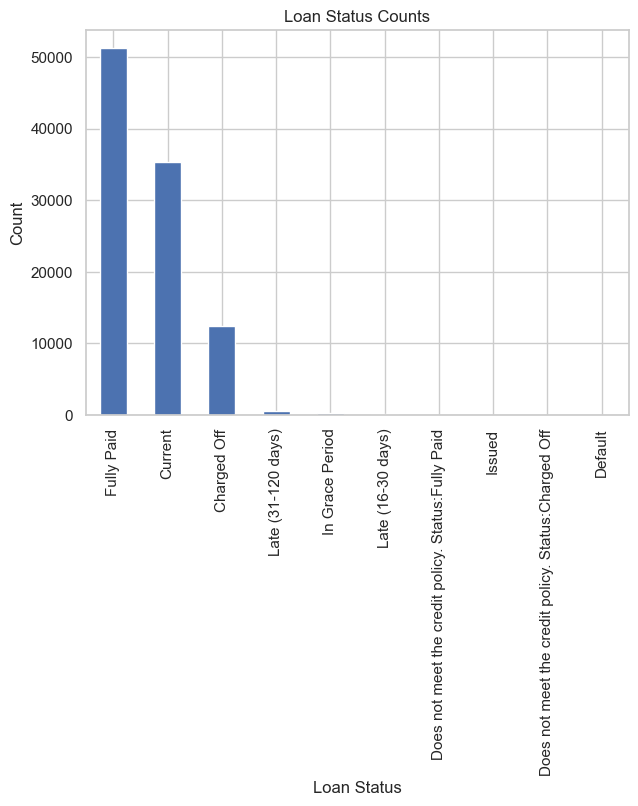

In [7]:
# Calculate the value counts for loan status
loan_status_counts = df['loan_status'].value_counts()

# Plot with matplotlib
plt.figure(figsize=(7, 5))  # width=500/100 and height=350/100 for similar sizing in inches
loan_status_counts.plot(kind='bar')

# Set title and labels
plt.title("Loan Status Counts")
plt.xlabel("Loan Status")
plt.ylabel("Count")

# Show the plot
plt.show()

Let's simplify this list and create a more black and white view.

**Below Code Block Explained**: This block creates a logical grouping for Paid Loans, and Defaulted loans. It then further loops through the data frame and retains only the rows that contain Paid Loans and Defaulted Loans.

In [8]:
# Define the logical groupings for 'loan_status'
loan_status_groupings = {
    'Fully Paid': 'Paid Loan',
    'Does not meet the credit policy. Status:Fully Paid': 'Paid Loan',
    'Charged Off': 'Defaulted Loan',
    'Does not meet the credit policy. Status:Charged Off': 'Defaulted Loan',
    'Default': 'Defaulted Loan'
}

# Apply the grouping to the 'loan_status' column
df['loan_status_grouped_kn'] = df['loan_status'].replace(loan_status_groupings)

# Retain only rows with 'Paid Loan' or 'Defaulted Loan'
df = df[df['loan_status_grouped_kn'].isin(['Paid Loan', 'Defaulted Loan'])]

# Verify the groupings
print(df['loan_status_grouped_kn'].value_counts())

loan_status_grouped_kn
Paid Loan         51258
Defaulted Loan    12431
Name: count, dtype: int64


In [9]:
df.shape

(63689, 144)

**Below Code Block Explanation**: This block visualizes the distribution of loan amounts for each loan status category using Kernel Density Estimation (KDE) plots. It iterates over the unique values of loan_status_grouped_kn and creates a filled KDE plot for each category (Paid Loan or Defaulted Loan). The resulting graph allows for a comparison of loan amount distributions between different loan statuses, providing insights into any potential differences in loan amount trends across the two groups.

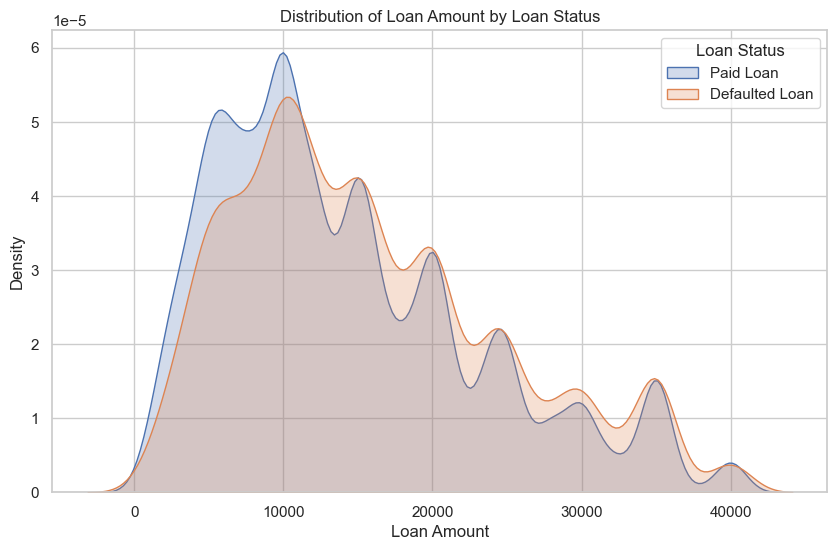

In [10]:
plt.figure(figsize=(10, 6))
for status in df['loan_status_grouped_kn'].unique():
    sns.kdeplot(df[df['loan_status_grouped_kn'] == status]['loan_amnt'], label=status, fill=True)
plt.title('Distribution of Loan Amount by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.legend(title="Loan Status")
plt.show()

Lets look at the loan_status against employment length.

In [11]:
df['emp_length'].info()

<class 'pandas.core.series.Series'>
Index: 63689 entries, 2 to 99999
Series name: emp_length
Non-Null Count  Dtype 
--------------  ----- 
59733 non-null  object
dtypes: object(1)
memory usage: 995.1+ KB


Here we can see that `emp_length` is a string value. We'll change this later on but for our initial analysis let's 

In [19]:
# Set the option to handle future downcasting behavior
pd.set_option('future.no_silent_downcasting', True)

# Replace NaN values in emp_length with None and convert to integer values
df['emp_length_cleaned'] = df['emp_length'].replace({
    '10+ years': 10,
    '9 years': 9, '8 years': 8, '7 years': 7, '6 years': 6, '5 years': 5,
    '4 years': 4, '3 years': 3, '2 years': 2, '1 year': 1, '< 1 year': 0,
    'n/a': None  # Assuming 'n/a' represents missing values
}).astype('Int64')  # Use 'Int64' for integer with support for NaN

# Drop any NaN values in emp_length_cleaned if necessary
df = df.dropna(subset=['emp_length_cleaned'])

# Create a crosstab of loan_status_grouped_kn and emp_length_cleaned
emp_length_counts = pd.crosstab(df['emp_length_cleaned'], df['loan_status_grouped_kn'])

# Calculate the percentage for each loan status within each employment length year
emp_length_percentage = emp_length_counts.div(emp_length_counts.sum(axis=1), axis=0) * 100

# Sort the index of emp_length_percentage in descending order
emp_length_percentage = emp_length_percentage.sort_index(ascending=False)

# Format each column to two decimal places with a % sign using map
for col in emp_length_percentage.columns:
    emp_length_percentage[col] = emp_length_percentage[col].map(lambda x: f"{x:.2f} %")

# Display the resulting table
emp_length_percentage

loan_status_grouped_kn,Defaulted Loan,Paid Loan
emp_length_cleaned,,
10,17.75 %,82.25 %
9,20.39 %,79.61 %
8,19.65 %,80.35 %
7,18.86 %,81.14 %
6,20.20 %,79.80 %
5,19.59 %,80.41 %
4,21.03 %,78.97 %
3,19.13 %,80.87 %
2,18.48 %,81.52 %


# Missing Value Analysis

**Below code Block Explanation**: This block identifies columns with missing values and sorts them in descending order by count. It provides a clear view of the extent of missing data, aiding decisions on handling or imputing missing values based on the proportion of NaNs in each column.

In [ ]:
# Check for Missing Values
nan_list = df.isna().sum()
if nan_list.sum() == 0:
    print("No column has NaN values")
else:
    print("Columns with NaN values (sorted high to low):")
    print(nan_list[nan_list > 0].sort_values(ascending=False))


**Below code Block Explanation**: This block generates binary indicators for missing values across columns, adding additional columns to flag where data was missing. These indicators can sometimes be useful as features, helping models understand data patterns related to missingness.

In [ ]:
# Create Missing Data Indicators for Categorical Columns
def create_missing_indicators(df):
    missing_indicators = pd.DataFrame(index=df.index)  # Create an empty DataFrame to store missing indicators
    
    # Loop through all columns in df
    for col in df.columns:
        # Check if column is categorical
        if df[col].dtype == 'object':
            # Create missing indicator for the categorical column
            missing_indicators[f"{col}_missing"] = df[col].isna().astype(int)
    
    # Concatenate the original DataFrame with the missing indicators
    df_with_indicators = pd.concat([df, missing_indicators], axis=1)
    
    return df_with_indicators

# Run the function on the DataFrame to create missing indicators for categorical columns
df_with_missing_indicators = create_missing_indicators(df)

# Display the first few rows of the resulting DataFrame
print(df_with_missing_indicators.head())

**Below code Block Explanation**: This block preprocesses categorical variables by filling missing values with "Other" and applying binary encoding. Binary encoding is used here to handle high-cardinality categorical features efficiently, making the encoded features suitable for machine learning models. The target column (loan_status) is excluded from encoding to avoid unintended transformations.

In [ ]:
# Preprocess Categorical Variables with Progress Bar
categorical_columns = [col for col in df_with_missing_indicators.select_dtypes(include=['object', 'category']).columns if col != 'loan_status']
for col in tqdm(categorical_columns, desc="Filling missing values in categorical columns"):
    df[categorical_columns] = df[categorical_columns].fillna("Other")

binary_encoder = ce.BinaryEncoder(cols=categorical_columns, drop_invariant=True)
X_encoded = binary_encoder.fit_transform(df.drop(columns=['loan_status']))

print(f"DataFrame shape after categorical preprocessing: {X_encoded.shape}")

**Below code Block Explanation**: This code fills any remaining missing values in numerical columns with zero, ensuring there are no NaN values in the dataset, which might disrupt model training. This imputation method may not be suitable for all cases but is quick for models that handle sparse data well.

In [ ]:
# Fill Missing Numerical Values with Progress Bar
X_encoded = X_encoded.select_dtypes(include=['number']).columns
for col in tqdm(X_encoded, desc="Imputing missing numerical values"):
    df[col] = df[col].fillna(0)

print(f"DataFrame shape after numerical preprocessing: {X_encoded.shape}")

**Below code Block Explanation**: This function checks the DataFrame for infinite values, which can disrupt calculations and model training. If any columns contain infinite values, it lists them; otherwise, it confirms no infinite values exist. This is a helpful quality check step before proceeding with further data processing.

In [ ]:
# Check for Infinite Values
def check_infinity(df):
    try:
        # Apply np.isinf only to numeric columns
        numeric_cols = df.select_dtypes(include=[np.number])
        infinite_mask = np.isinf(numeric_cols)
        infinite_list = infinite_mask.sum()
        if infinite_list.sum() == 0:
            print("No column has infinite values")
        else:
            print("Columns with infinite values:")
            print(infinite_list[infinite_list > 0].sort_values(ascending=False))
    except Exception as e:
        # Identify the columns that may be causing the error
        problematic_cols = []
        for col in df.columns:
            try:
                np.isinf(df[col])
            except TypeError:
                problematic_cols.append(col)
        
        print(f"An error occurred while checking for infinite values: {e}")
        if problematic_cols:
            print(f"The following columns may be causing the issue due to incompatible types: {problematic_cols}")

check_infinity(X_encoded)

**Below code Block Explanation**: Here, X and y are defined as the feature matrix and target variable, respectively. The data is then split into training and testing sets, reserving 20% of the data for testing. This separation is essential for evaluating model performance on unseen data.

In [ ]:
# Ensure that X_encoded and y are aligned
assert len(X_encoded) == len(df), "Mismatch between X_encoded and df, ensure they are aligned before splitting."

# Define X and y Variables
X = X_encoded
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Below code Block Explanation**: The target variable (loan_status) is label-encoded to convert categorical values into numeric labels, which are necessary for most machine learning algorithms. This step ensures compatibility with scikit-learn’s models.

In [ ]:
# Encode Target Variable
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

**Below code Block Explanation**: This block calculates the Variance Inflation Factor (VIF) for each feature to assess multicollinearity. High VIF values indicate high correlation among predictors, which can affect model stability and interpretability. This information guides the removal of redundant features.

In [ ]:
# Check for Missing or Infinite Values in DataFrame
def check_missing_or_infinite(df):
    columns_with_issues = []
    for col in df.columns:
        # Only process columns if they are numeric
        if df[col].dtype in [np.float64, np.float32, np.int64, np.int32]:
            if df[col].isna().any() or np.isinf(df[col]).any():
                columns_with_issues.append(col)

    if len(columns_with_issues) > 0:
        print(f"The following columns contain NaN or infinite values: {columns_with_issues}")
    else:
        print("No columns contain NaN or infinite values.")

# Run the check on X_encoded before calculating VIF
check_missing_or_infinite(X_encoded)

In [ ]:
X_encoded[['dti', 'mths_since_last_delinq', 'mths_since_last_record', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'deferral_term', 'hardship_amount', 'hardship_length', 'hardship_dpd', 'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount']].head()

In [ ]:
X_encoded[['dti', 'mths_since_last_delinq', 'mths_since_last_record', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'deferral_term', 'hardship_amount', 'hardship_length', 'hardship_dpd', 'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount']].info()

In [ ]:
# Function to calculate VIF with Progress Bar
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [
        variance_inflation_factor(X.values, i) for i in tqdm(range(X.shape[1]), desc="Calculating VIF")
    ]
    return vif_data

# Calculate VIF for the original DataFrame
vif_data_original = calculate_vif(X_encoded)

# Remove features with high VIF
high_vif_features = vif_data_original[vif_data_original["VIF"] > 5]["feature"].tolist()
X_encoded = X_encoded.drop(columns=high_vif_features)

# Calculate VIF and print results for missing data indicators
missing_indicators_columns = [col for col in X_encoded.columns if '_missing' in col]
vif_data_missing = calculate_vif(X_encoded[missing_indicators_columns])
print("VIF for missing data indicators:\n", vif_data_missing)

**Below code Block Explanation**: This block removes features with a VIF above 5, indicating high collinearity. By filtering out these features, we reduce redundancy, making the feature set more interpretable and less prone to multicollinearity issues.

In [ ]:
# Remove High-VIF Features
high_vif_features = vif_data[vif_data["VIF"] > 5]["feature"].tolist()
X_vif_reduced = X.drop(columns=high_vif_features)
print("\nFeatures remaining after VIF filtering:\n", X_vif_reduced.columns)


**Below code Block Explanation**: Using Recursive Feature Elimination (RFE) with a linear regression model, this block selects the top 5 most informative features from the reduced feature set (X_vif_reduced). RFE iteratively removes the least important features based on the model's criteria, improving model efficiency.

In [ ]:
# Recursive Feature Elimination (RFE)
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=5)
X_rfe_reduced = rfe.fit_transform(X_vif_reduced, y)

selected_features = X_vif_reduced.columns[rfe.support_]
print("\nFeatures selected by RFE:\n", selected_features)

**Below code Block Explanation**: This final block applies RFE using a RandomForestClassifier on numerical columns. The model selects 48 features and eliminates 18 in each iteration, focusing on numerical features only. The selected features from RandomForest RFE are displayed, providing insight into the most informative numerical predictors.

In [ ]:
# RandomForest RFE for Numerical Columns
rf = RandomForestClassifier(n_estimators=150, random_state=42)
rfe = RFE(estimator=rf, n_features_to_select=48, step=18, verbose=3)
X_train_numerical = X_train.select_dtypes(include=['number'])
rfe.fit(X_train_numerical, y_train)

selected_features_rf = X_train_numerical.columns[rfe.support_]
print("\nNumerical Features selected by RandomForest RFE:\n", selected_features_rf)

**Below code Block Explanation**: Models we'll run

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Define a dictionary of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(silent=True, random_state=42)
}


**Below code Block Explanation**: This block evaluates multiple models in a dictionary called models using a progress bar to track completion. For each model, it chooses the correct evaluation function (evaluate_model_multi or evaluate_model_single) based on the multi_class_strategy parameter. If models is not defined, it provides an alert to avoid errors. The results from each evaluation are stored in a list for later review or analysis.

In [ ]:
# Evaluating models based on user selection with progress bar
results = []
if models is not None:
    for name, model in tqdm(models.items(), desc="Evaluating models"):
        # Choose the correct evaluation function based on model type
        if multi_class_strategy:
            result = evaluate_model_multi(
                name, model, X_train, X_test, y_train, y_test,
                save_path=SAVE_PATH,
                multi_class_strategy=multi_class_strategy  # Pass strategy to evaluation function
            )
        else:
            result = evaluate_model_single(
                name, model, X_train, X_test, y_train, y_test,
                save_path=SAVE_PATH
            )
            
        results.append(result)
else:
    print("Model evaluation was not performed due to invalid selection.")


**Below code Block Explanation**: This block converts the list of evaluation results into a DataFrame for a clear summary and displays it. It optionally saves the results to a CSV file, making it easier to analyze or share the performance metrics across different models.

In [ ]:
# Convert results list to a DataFrame for better visualization and analysis
results_df = pd.DataFrame(results)
print("\nEvaluation Results Summary:")
print(results_df)

# Optionally, save results to a CSV file
results_df.to_csv(f"{SAVE_PATH}/model_evaluation_summary.csv", index=False)

**Below code Block Explanation**: This block generates a line plot to compare different performance metrics across models. Each line represents a metric, such as accuracy or F1-score, helping identify which model performs best in each area. This visualization is valuable for quickly assessing model strengths and trade-offs.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `results` is the list of dictionaries created by the model evaluation function
# Convert the list of results into a DataFrame for tabular display
results_df = pd.DataFrame(results)

# Display results as a table for easy comparison
print("\nModel Performance Metrics:")
display(results_df)  # If running in a Jupyter notebook, this will display a nice formatted table

# Visualize Performance Comparison
plt.figure(figsize=(12, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Cross-Validation Mean Accuracy']

# Plot each metric for all models
for metric in metrics:
    plt.plot(results_df['Model'], results_df[metric], marker='o', label=metric)

# Customize the plot
plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.legend(loc="best")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Below code Block Explanation**: This block saves each model to disk, enabling easy reuse without retraining. Each model is saved with a descriptive filename, storing it in the specified SAVE_PATH. This is especially useful when working with multiple models and allows for future analysis or deployment.

In [ ]:
# Save All Models for Future Use
for name, model in models.items():
    joblib.dump(model, f"{SAVE_PATH}/{name}_final_model.pkl")
print("\nAll models have been saved for future use.")


In [ ]:
# === SHAP Explanations for Model Interpretability ===
import shap

# Initialize SHAP Explainer for each model
def explain_model_with_shap(model, X_sample, model_name="Model"):
    """
    Generates SHAP explanations for the given model and dataset sample.

    Parameters:
    ----------
    model : estimator object
        The trained model to explain.
    X_sample : DataFrame
        A sample of the dataset to generate SHAP values for.
    model_name : str
        Name of the model for display in plots.
    """
    print(f"\nGenerating SHAP explanations for {model_name}...")
    
    # Use SHAP's TreeExplainer for tree-based models (e.g., RandomForest, XGBoost, LightGBM)
    if hasattr(model, 'predict_proba'):
        explainer = shap.Explainer(model, X_sample, check_additivity=False)
    else:
        explainer = shap.Explainer(model)
    
    # Calculate SHAP values
    shap_values = explainer(X_sample)

    # Plot feature importance summary
    shap.summary_plot(shap_values, X_sample, plot_type="bar", show=True)
    
    # Detailed summary plot with individual SHAP values per feature and instance
    shap.summary_plot(shap_values, X_sample, show=True)

    # Example force plot for the first prediction (requires a single instance)
    shap.force_plot(explainer.expected_value, shap_values[0, :], X_sample.iloc[0, :], matplotlib=True)


# Choose a subset of data to explain (e.g., a random sample of 100 rows)
X_sample = X_test.sample(100, random_state=42)

# Explain the main trained model (example: RandomForestClassifier)
explain_model_with_shap(RandomForestClassifier, X_sample, model_name="RandomForestClassifier")

# Loop to explain all models in a dictionary (if multiple models)
for name, model in models.items():
    explain_model_with_shap(model, X_sample, model_name=name)